# Automatic Classification of Bright Retinal Lesions via Deep Network Features
**Original Paper Authors**
Ibrahim Sadeka,b,*, Mohamed Elawadyc,e, Abd El Rahman Shabayekd,e

### A reimplementation of the paper using python instead of matlab
Under supervision of Dr. Ibrahim Sadek, ibrahim.sadek@ipal.cnrs.fr

**Reimplementation Authors**
| **Name** | **Email** |
| --- | --- |
|[Mohamed Gaafer](github.com/mo-gaafar)| mohamed_gaafer@ieee.org|
|[Zeyad Mansour](github.com/ZeyadAlo) | zeyadmansour2@gmail.com |
|[Abdullah Saeed](github.com/abdullahsaeed10) ||
|[Maryam Moataz](github.com/maryamoataz) ||


In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from PIL import Image
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay


# Code Structure
These are the main steps of the code:
1. Image Loading
2. Network Configuration
3. Data Preprocessing
4. CNN Feature Extraction using GoogleNet
5. Load pretrained SVM Model and Predict based on CNN Features


## 1. Image Loading

In [27]:
import ipywidgets as widgets
import os

directory = ""

# Function to display image files in a directory
def display_files(directory):
    file_list = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')): 
                file_list.append(os.path.join(root, file))
    file_widget.options = file_list

# Define the directory widget
directory_widget = widgets.Text(value='../input', description='Directory:')
display(directory_widget)

# Define the file selection widget
file_widget = widgets.Dropdown(options=[], description='Files:')
display(file_widget)

# Define the callback function for directory changes
def directory_changed(change):
    directory = change['new']
    display_files(directory)
    print(directory)

# Link the directory widget to the callback function
directory_widget.observe(directory_changed, names='value')

# Initialize the file list
display_files(directory_widget.value)


Text(value='../input', description='Directory:')

Dropdown(description='Files:', options=(), value=None)

In [47]:
print("directory")
print(file_widget.value)

im = Image.open(file_widget.value)

directory
../input/drusen/sample3.jpg


## 2. Network Configuration

In [66]:
#googlenet
# model_googlenet = keras.applications.inception_v3.InceptionV3(weights='imagenet')
model_googlenet = keras.applications.VGG16(weights='imagenet'
                                          , include_top=False
                                          , input_shape=(224, 224, 3)
                                          , classes=1000)
#select and display the layer from ipywidget dropdown
layers_list = [layer.name for layer in model_googlenet.layers]
layer_widget = widgets.Dropdown(options=layers_list, description='Layers:')
display(layer_widget)


Dropdown(description='Layers:', options=('input_10', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_co…

In [102]:
model = Model(inputs=model_googlenet.input, outputs=model_googlenet.get_layer(layer_widget.value).output)
# model_googlenet.summary()


## 3. Data Preprocessing

In [103]:
# Data Pre-processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

img = image.load_img(file_widget.value, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


## 4. CNN Feature Extraction using GoogleNet

1/1 [==============================] - 0s 460ms/step
(1, 14, 14, 512)


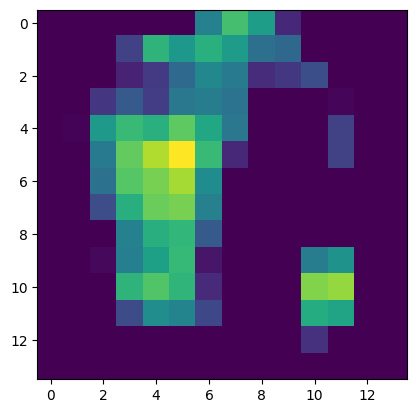

In [104]:
# CNN Feature Extraction using GoogleLeNet Model
features = model.predict(x)
print(features.shape)
plt.imshow(features[0,:,:,0])

# # one hot encode target values
# from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.utils import to_categorical




## 5. SVM Prediction using CNN Features

In [105]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Flatten the features into one-dimensional vectors
features_train = features_train.reshape(features_train.shape[0], -1)
features_test = features_test.reshape(features_test.shape[0], -1)

# Train an SVM classifier on the flattened features
clf = SVC(kernel='linear', C=1.0, probability=True)
clf.fit(features_train, labels_train)


class_names = ['Drusen', 'Exudate', 'Normal', ...] 
predicted_class_name=[]
# Classify the image using the SVM classifier
for i in range(0, len(features_test)):
    predicted_label = clf.predict(features_test)[i]
    predicted_class_name.append(predicted_label)

# Output the classification result   
print(predicted_class_name)   
print(labels_test)

cm = confusion_matrix(labels_test, predicted_class_name)
print(cm)



ValueError: Found input variables with inconsistent numbers of samples: [1, 3]

## 6. Evaluation
Criteria used for evaluation:
- Sensitivity, specificity, accuracy, F-score, the area
under the curve
- Robustness
- Methodology
- Computational time

In [ ]:
# # Confusion matrix plot
# # Array of labels and predictions "drusen, exudates, normal"
# labels = ['drusen', 'exudates', 'normal']
# predictions = ['drusen', 'exudates', 'normal']

# def confusion_matrix(labels, predictions):
#     # Get number of unique classes
#     classes = np.unique(np.concatenate((labels, predictions)))
#     # Create the confusion matrix
#     cm = pd.DataFrame(confusion_matrix(labels, predictions, labels=classes), index=classes, columns=classes)
#     return cm

# # Calculate confusion matrix
# cm = confusion_matrix(labels, predictions)

# # Dataframe of confusion matrix

# Plot the confusion matrix
# plot_confusion_matrix(clf, features_test, labels_test, cmap=plt.cm.Blues)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

# Calculate the sensitivity
sensitivity = recall_score(labels_test, predicted_class_name, average='macro')

# Extract the true negatives (TN) and false positives (FP) for each class
tn_0 = np.sum(cm[1:, 1:])  # TN for class 0
fp_0 = np.sum(cm[1:, 0])   # FP for class 0
tn_1 = np.sum(np.vstack((cm[0, 0], cm[2, 2])))  # TN for class 1
fp_1 = np.sum(np.hstack((cm[0, 1:], cm[2, :2])))  # FP for class 1
tn_2 = np.sum(cm[:2, :2])  # TN for class 2
fp_2 = np.sum(np.hstack((cm[:2, 2], cm[2, 0:2])))  # FP for class 2

# Calculate the specificity for each class
spec_0 = tn_0 / (tn_0 + fp_0)
spec_1 = tn_1 / (tn_1 + fp_1)
spec_2 = tn_2 / (tn_2 + fp_2)

# Calculate the accuracy score
accuracy = accuracy_score(labels_test, predicted_class_name)

# Calculate the F-score
f_score = f1_score(labels_test, predicted_class_name, average='weighted')

# Calculate the AUC score
y_test = np.reshape(labels_test, (-1, 1))
y_pred = np.reshape(predicted_class_name, (-1, 1))
y_pred = normalize(y_pred, axis=1, norm='l1')
y_test = normalize(y_test, axis=1, norm='l1')

auc_score = roc_auc_score(y_test, y_pred, multi_class='ovr')

print("Sensitivity: {:.2f}".format(sensitivity))

print("Specificity for class Drusen: {:.2f}".format(spec_0))
print("Specificity for class Exudate: {:.2f}".format(spec_1))
print("Specificity for class Normal: {:.2f}".format(spec_2))

print("Accuracy: {:.2f}".format(accuracy))

print("F-score: {:.2f}".format(f_score))

print("AUC: {:.2f}".format(auc_score))

# show the confusion matrix plot
plt.show()

TypeError: confusion_matrix() got multiple values for argument 'labels'